




<h1>Decision Tree Classification oh Diabetes Dataset</h1>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/diabetes_.csv')

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#feature variable

x = data.iloc[:,:8]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
#target variable

y = data.iloc[:,8:9]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


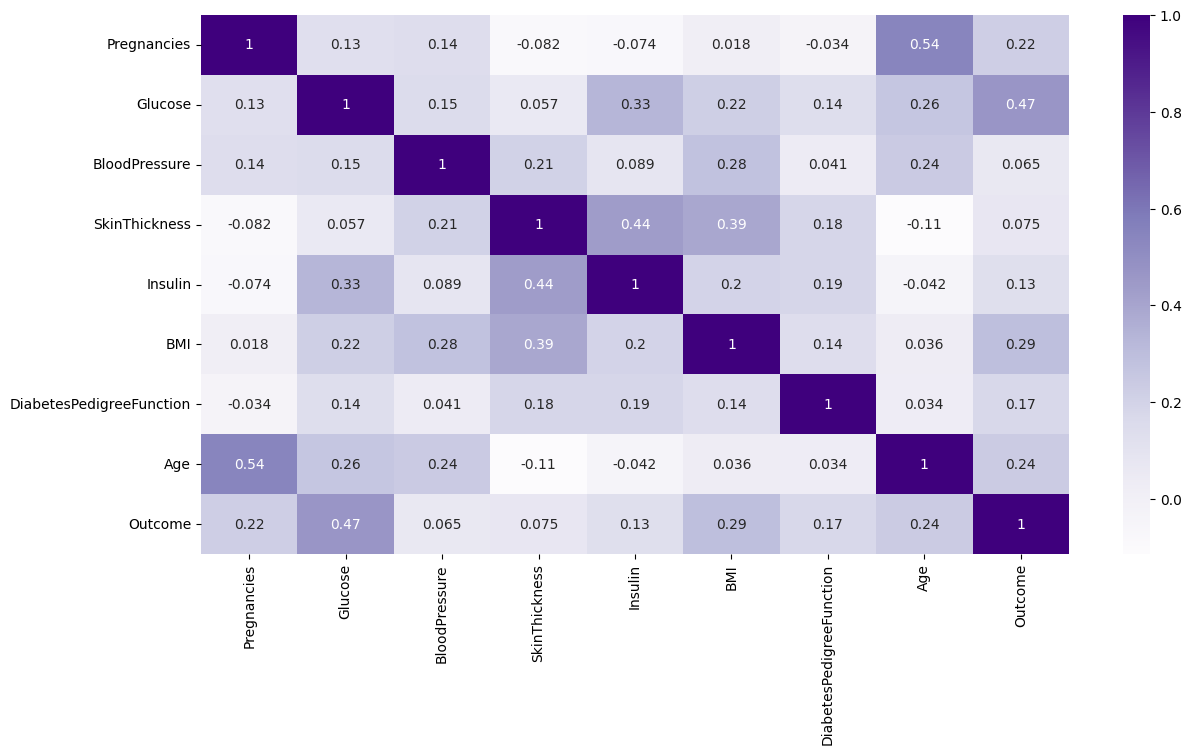

In [8]:
plt.figure(figsize = (14, 7))
sns.heatmap(data.corr(), annot = True, cmap = 'Purples')
plt.show()

<h2>Splitting data</h2>

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
#create Decision Tree Classifier object
model = DecisionTreeClassifier()

#Train Decision Tree Classifier
model = model.fit(x_train, y_train)

#predict the response for the test dataset
y_pred = model.predict(x_test)

In [ ]:
#evaluation using Accuracy score
from sklearn import metrics

#import scikit-learn matrics module for accuracy calculation
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy:  67.53246753246754


In [ ]:
#Evaluation using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[77, 22],
       [28, 27]])

In [ ]:
#Evaluation using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75        99
           1       0.55      0.49      0.52        55

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.64       154
weighted avg       0.67      0.68      0.67       154



In [ ]:
#import modules for visualizing Decision trees
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
features = x.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = features, class_names =['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Create Decision Tree Classifier object
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

#Train Decision Tree Classifier
model = model.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

#model Accuracy
print("Accuracy:" , metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 79.87012987012987


<h3>The classification rate increased to 79.87%. which is better accuracy than the preious model</h3>

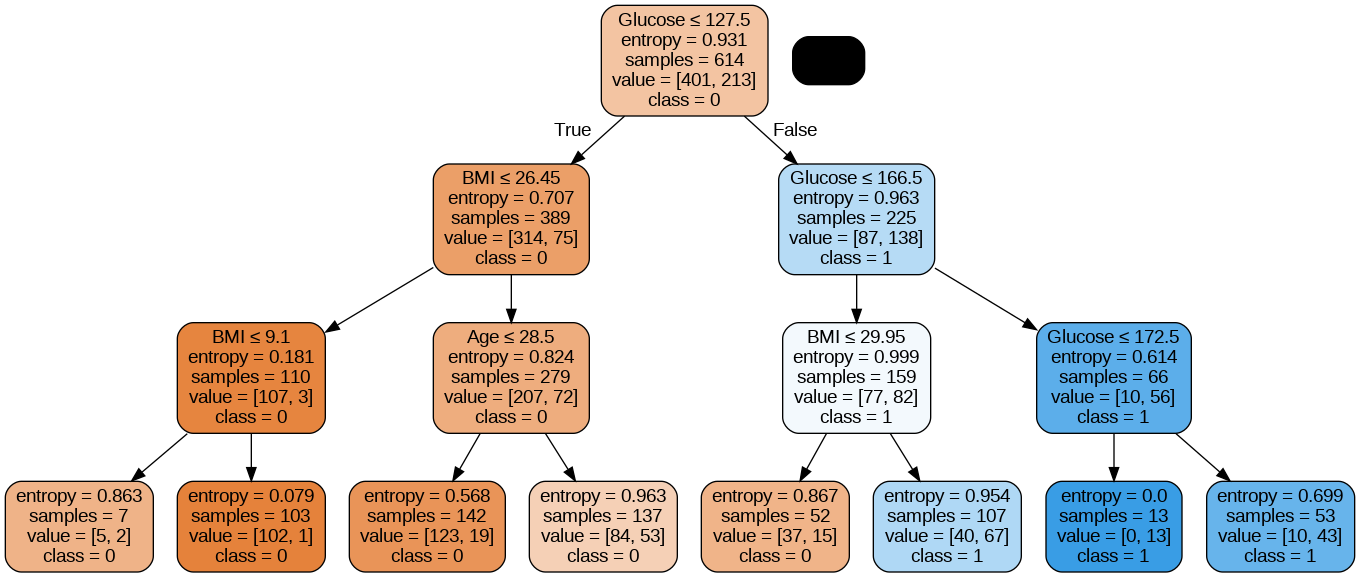

In [ ]:
#Better Decision Treee visualization
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = features, class_names =['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())